# Simple MNIST NN from scratch

The following code goes through a simple two-layer neural network which is trained unter the MNIST diget dataset. It's a small personal project that I found interesting and goes through the basics of LLM's without the usage of large libraries that would make it simplier like sklearn, etc

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/Users/justind/Documents/character-recognition/train.csv')

In [2]:


data = np.array(data)
m, n = data.shape # row(each image) & column (values for images, close to 784, img are 28x28)
np.random.shuffle(data) # shuffle before splitting into dev and training sets


# data that that will be used to train the model
data_dev = data[0:1000].T #columns are now image data, rows are an individual image per row
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


# data set asside to use later and prevent model for overfitting and used to test model before using final test set values
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([8, 4, 1, ..., 1, 7, 0])

In [4]:
'''
layer(num): represents the current layer in the LLM, 
weight(num): represents the weights for a specific layer in the LLM
bias(num): represents the biases for a specific layer in the LLM

note: that the if there's a "d" before any variable it represents the derivative 
    or amount of change for certain values depending on it's application
'''
def init_params(): 
    weight1 = np.random.rand(10, 784) - 0.5
    bias1 = np.random.rand(10, 1) - 0.5
    weight2 = np.random.rand(10, 10) - 0.5
    bias2 = np.random.rand(10, 1) - 0.5
    return weight1, bias1, weight2, bias2

def ReLU(layer):
    layer = tanh(layer)
    return np.maximum(layer, 0)

def tanh(layer):
    return (np.exp(layer) - np.exp(-layer)) / (np.exp(layer) + np.exp(-layer))

#output later and returns probability for "value possibility" current value
def softmax(layer):
    A = np.exp(layer) / sum(np.exp(layer))
    return A

def forward_prop(weight1, bias1, weight2, bias2, X):
    layer1= weight1.dot(X) + bias1 #hidden layer 
    activation1 = ReLU(layer1) # first layer with activation function which used ReLu and tanh propagation
    layer2 = weight2.dot(activation1) + bias2 #output layer
    activation2 = softmax(layer2) #probability per value
    return layer1, activation1, layer2, activation2

def ReLU_deriv(layer): #ReLU activation layer derivative with tanH derivative incorporated
    layer = tanH_deriv(layer)
    return layer > 0

def tanH_deriv(layer): #tanH activation layer derivative 
    layer = 1 - np.square(tanh(layer))
    return layer

#matrix 10xm, where 1 is assigned to the expected value in the row. ex: expected=4, so matrix column for specifc value would be all 0's and index 4 would be 1 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# weights and biasies are created after values/predictions are made
# output layer -> input layer calculating error, finding weights and biases associate to the error and modifying those given values
def backward_prop(layer1, activation1, layer2, activation2, weight1, weight2, X, Y):
    #finding error from 2nd layer(output predictions)
    one_hot_Y = one_hot(Y) # value that should occur
    dlayer2 = activation2 - one_hot_Y # output layer error | prediction - result that should occur 
    dweight2 = 1 / m * dlayer2.dot(activation1.T) # weights error with respect to layer 2
    dbias2 = 1 / m * np.sum(dlayer2) # average of layer 2, how inaccurate it is 
    #finding error from first layer
    dlayer1= weight2.T.dot(dlayer2) * ReLU_deriv(layer1) #"error from second layer and applying weights in reverse to get errors from first layer (hidden layer)" (forward propagation in reverse)
    dweight1 = 1 / m * dlayer1.dot(X.T) # how much the weights contribution to error in layer 1
    dbias1 = 1 / m * np.sum(dlayer1) # how much to nudge biases
    return dweight1, dbias1, dweight2, dbias2

#updating parameters after backwards-prop and finding errors given
#alpha is the learning rate
def update_params(weight1, bias1, weight2, bias2, dweight1, dbias1, dweight2, dbias2, alpha):
    weight1 = weight1 - alpha * dweight1
    bias1 = bias1 - alpha * dbias1    
    weight2 = weight2 - alpha * dweight2  
    bias2 = bias2 - alpha * dbias2    
    return weight1, bias1, weight2, bias2

In [5]:
def get_predictions(activation2):
    return np.argmax(activation2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


#performing the entire training of the model consisting of forward and backward propagations, and displaying error for every 10 iterations out of 500 total iterations
def gradient_descent(X, Y, alpha, iterations):
    weight1, bias1, weight2, bias2 = init_params()
    for i in range(iterations):
        layer1, activation1, layer2, activation2 = forward_prop(weight1, bias1, weight2, bias2, X)
        dweight1, dbias1, dweight2, dbias2 = backward_prop(layer1, activation1, layer2, activation2, weight1, weight2, X, Y)
        weight1, bias1, weight2, bias2 = update_params(weight1, bias1, weight2, bias2, dweight1, dbias1, dweight2, dbias2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(activation2)
            print(get_accuracy(predictions, Y))
    return weight1, bias1, weight2, bias2

In [6]:
weight1, bias1, weight2, bias2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 6 4 ... 1 4 9] [8 4 1 ... 1 7 0]
0.08617073170731707
Iteration:  10
[2 6 1 ... 1 7 0] [8 4 1 ... 1 7 0]
0.19439024390243903
Iteration:  20
[3 7 1 ... 1 7 0] [8 4 1 ... 1 7 0]
0.2775609756097561
Iteration:  30
[3 4 1 ... 1 7 0] [8 4 1 ... 1 7 0]
0.33165853658536587
Iteration:  40
[3 4 1 ... 1 7 0] [8 4 1 ... 1 7 0]
0.3581463414634146
Iteration:  50
[3 4 1 ... 1 7 0] [8 4 1 ... 1 7 0]
0.3743658536585366
Iteration:  60
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.3885609756097561
Iteration:  70
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.40439024390243905
Iteration:  80
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.4173170731707317
Iteration:  90
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.4279268292682927
Iteration:  100
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.43729268292682927
Iteration:  110
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.45134146341463416
Iteration:  120
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.4632926829268293
Iteration:  130
[3 4 1 ... 1 1 0] [8 4 1 ... 1 7 0]
0.4733414634146341
Iteration: 

~83% accuracy on training set.

In [7]:
def make_predictions(X, weight1, bias1, weight2, bias2):
    _, _, _, activation2 = forward_prop(weight1, bias1, weight2, bias2, X)
    predictions = get_predictions(activation2)
    return predictions

def test_prediction(index, weight1, bias1, weight2, bias2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, weight1, bias1, weight2, bias2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  8


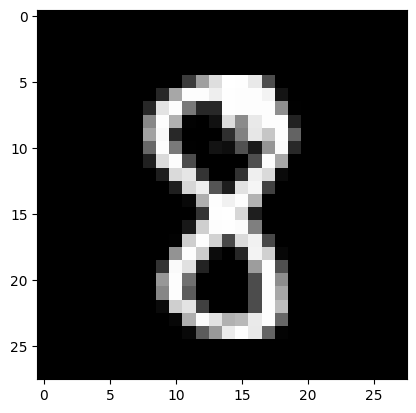

Prediction:  [4]
Label:  4


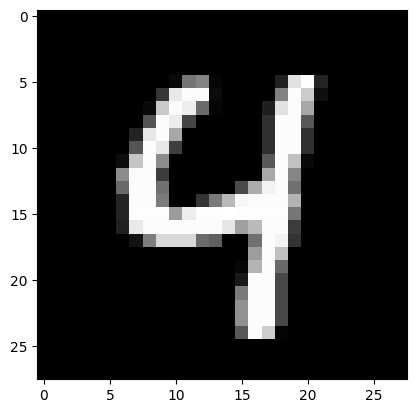

Prediction:  [1]
Label:  1


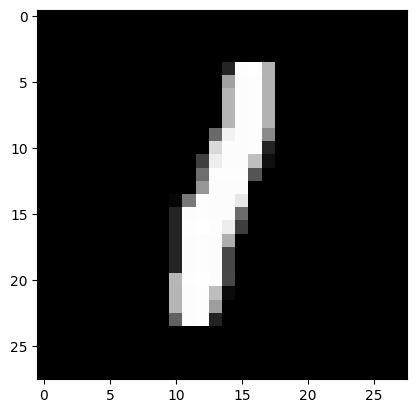

Prediction:  [6]
Label:  6


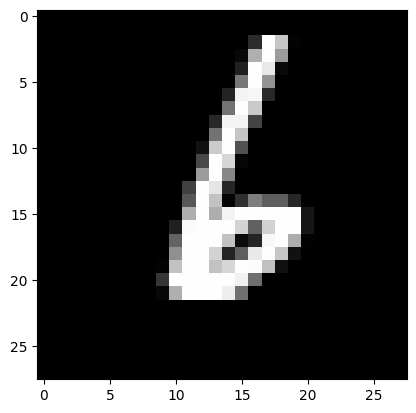

In [8]:
test_prediction(0, weight1, bias1, weight2, bias2)
test_prediction(1, weight1, bias1, weight2, bias2)
test_prediction(2, weight1, bias1, weight2, bias2)
test_prediction(3, weight1, bias1, weight2, bias2)

Finally, let's find the accuracy on the dev set:

In [9]:
dev_predictions = make_predictions(X_dev, weight1, bias1, weight2, bias2)
get_accuracy(dev_predictions, Y_dev)

[6 9 2 9 9 6 6 2 0 7 8 2 4 8 7 1 2 4 9 0 3 1 1 7 2 0 3 3 1 8 8 4 6 1 9 1 0
 2 4 0 6 2 9 0 1 0 3 1 8 4 7 2 0 7 6 7 8 8 4 8 0 8 1 6 7 5 1 8 2 7 8 6 2 8
 3 2 6 8 3 2 9 1 2 0 1 4 4 2 5 1 4 2 1 4 3 1 8 2 1 1 0 0 2 4 7 0 8 6 8 0 3
 1 8 9 1 2 4 8 0 1 7 3 1 4 1 8 5 6 5 8 4 4 0 2 3 7 7 1 8 4 1 9 6 0 6 4 2 0
 2 0 0 2 7 5 8 9 7 3 0 8 4 2 9 9 3 0 4 8 0 8 7 7 3 8 1 1 9 0 6 0 0 3 1 4 4
 6 4 5 7 0 7 9 8 7 3 4 1 2 4 0 6 6 1 7 2 7 4 7 6 1 6 7 3 0 6 1 5 9 8 8 2 3
 7 8 1 9 1 4 7 0 4 0 2 2 5 1 8 9 2 7 1 0 1 6 8 8 7 3 0 6 0 9 0 1 0 4 0 2 6
 3 2 6 4 2 8 6 4 5 6 9 0 4 9 3 7 1 3 0 8 1 1 0 0 1 1 4 4 4 0 4 5 1 7 1 1 1
 0 2 9 2 6 4 4 4 7 1 2 8 0 8 6 3 4 9 5 4 6 8 5 6 9 0 1 3 6 4 4 7 7 8 6 5 1
 2 3 3 1 6 3 3 9 3 7 9 0 4 6 4 0 3 7 4 0 1 4 8 4 2 8 6 9 1 7 1 8 7 9 1 7 0
 1 4 0 3 5 1 0 2 0 2 5 1 9 8 0 0 4 3 2 7 8 4 3 5 5 6 6 3 7 8 3 9 2 4 6 3 8
 8 7 8 3 5 2 3 1 0 9 8 4 1 1 3 4 7 1 6 1 3 2 8 6 2 7 1 6 1 9 4 0 1 7 6 4 8
 2 3 5 1 0 8 1 4 1 4 9 8 0 8 9 6 7 2 7 0 4 6 2 7 5 8 1 6 6 0 1 8 1 4 9 4 7
 6 4 7 0 7 7 6 2 3 7 3 2 

0.765

Still 85% accuracy, so our model generalized from the training data pretty well.